# CNN image classification using the Letters EMNIST dataset
I will train and evaluate an CNN on the Letters EMNIST dataset. It consists of 145600 grayscale images of 28x28 pixels each, and there are 37 classes.

In [31]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load the data
I use panda read_csv to get the letters dataset, that I downloaded from kaggle.

In [32]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letters = pd.read_csv('kaggle/input/emnist/emnist-letters-test.csv')
training_letters = pd.read_csv('kaggle/input/emnist/emnist-letters-train.csv')

In [33]:
print(training_letters.shape)
print(testing_letters.shape)

(88799, 785)
(14799, 785)


In [34]:
#training_letters
y1 = np.array(training_letters.iloc[:,0].values)
x1 = np.array(training_letters.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letters.iloc[:,0].values)
x2 = np.array(testing_letters.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


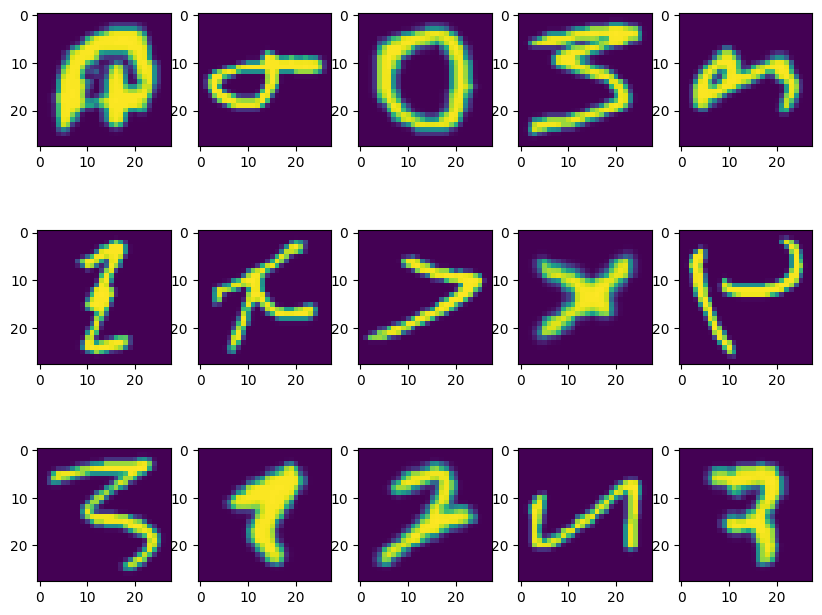

In [35]:
# How the images look.
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

# Normalisation and reshaping of data
Before feeding in the data to the model I will normalise and reshape the data. This will decrease the complexity of the models and make the model work efficiently as less complex numbers will be there to process

In [36]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [37]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

# I create a CNN for the classification of these random images

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split

In [39]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [40]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [41]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# Adding Callback API's to save best weights and change lr

In [42]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [43]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - ETA: 0s - loss: 0.5703 - accuracy: 0.8215
Epoch 1: val_accuracy improved from -inf to 0.88063, saving model to Best_points.h5
2220/2220 [==============================] - 121s 54ms/step - loss: 0.5703 - accuracy: 0.8215 - val_loss: 0.3770 - val_accuracy: 0.8806 - lr: 0.0010
Epoch 2/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2772 - accuracy: 0.9098
Epoch 2: val_accuracy improved from 0.88063 to 0.90130, saving model to Best_points.h5
2220/2220 [==============================] - 114s 52ms/step - loss: 0.2772 - accuracy: 0.9098 - val_loss: 0.3114 - val_accuracy: 0.9013 - lr: 0.0010
Epoch 3/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2112 - accuracy: 0.9292
Epoch 3: val_accuracy did not improve from 0.90130
2220/2220 [==============================] - 120s 54ms/step - loss: 0.2112 - accuracy: 0.9292 - val_loss: 0.3195 - val_accuracy: 0.9008 - lr: 0.0010
Epoch 4/10
2220/2220 [===============

In [44]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 2220}

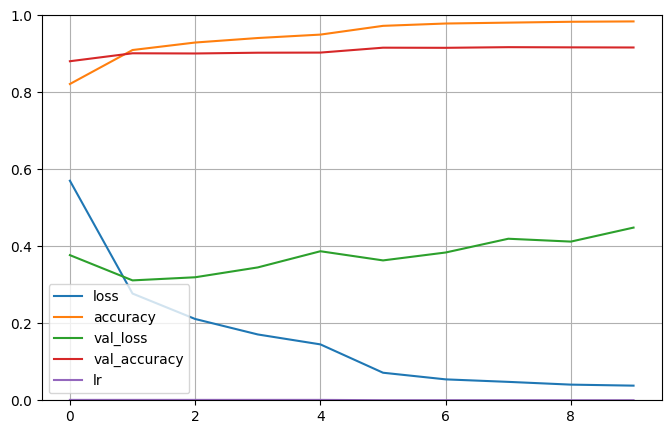

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluate the model

In [46]:
model.evaluate(test_x, test_y)

555/555 [==============================] - 4s 7ms/step - loss: 0.4485 - accuracy: 0.9163


[0.4485425651073456, 0.9163288474082947]

In [51]:
# Make predictions with probabilities for the first 3 instances in the test set.
X_new = test_x[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 24ms/step


array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.95,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [52]:
# Check if the predictions were correct.
y_new = test_y[:3]
y_new

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)